<a href="https://colab.research.google.com/github/Gauri0110/Python_Project_Cancer_prediction/blob/main/Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STEP 1: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ML tools

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
# STEP 2: Load Dataset (NO Upload – GitHub URL)

In [6]:
data_url = "https://github.com/ybifoundation/Dataset/raw/main/Admission%20Chance.csv"

df = pd.read_csv(data_url)
df.head()

,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
# STEP 3: Basic Data Exploration

In [8]:
df.shape


(400, 9)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No          400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4    SOP               400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [10]:
df.describe()


,Serial No,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [11]:
# STEP 4: Data Cleaning & Renaming

In [12]:
df = df.rename(columns={
    'GRE Score': 'Cell_Growth_Index',
    'TOEFL Score': 'Genetic_Risk_Score',
    'University Rating': 'Tumor_Stage',
    'SOP': 'Lifestyle_Risk',
    'LOR ': 'Family_History',
    'CGPA': 'Health_Index',
    'Research': 'Biopsy_Result',
    'Chance of Admit ': 'Cancer_Probability'
})


In [13]:
df.head()

,Serial No,Cell_Growth_Index,Genetic_Risk_Score,Tumor_Stage,SOP,Family_History,Health_Index,Biopsy_Result,Cancer_Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [14]:
# STEP 5: Convert Target to Classification (Cancer / No Cancer)

In [15]:
df['Cancer_Class'] = np.where(df['Cancer_Probability'] >= 0.7, 1, 0)


In [16]:
df[['Cancer_Probability', 'Cancer_Class']].head()


,Cancer_Probability,Cancer_Class
0,0.92,1
1,0.76,1
2,0.72,1
3,0.80,1
4,0.65,0


In [17]:
# STEP 6: Feature & Target Selection

In [18]:
X = df.drop(['Cancer_Probability', 'Cancer_Class'], axis=1)
y = df['Cancer_Class']


In [19]:
# STEP 7: Train-Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [21]:
# STEP 8: Feature Scaling

In [22]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
# STEP 9: Train Machine Learning Model

In [24]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [25]:
# STEP 10: Predictions

In [26]:
y_pred = model.predict(X_test_scaled)


In [27]:
# STEP 11: Model Evaluation

In [28]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.89

In [29]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.83      0.86        41
           1       0.89      0.93      0.91        59

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



In [30]:
# STEP 12: Confusion Matrix Visualization

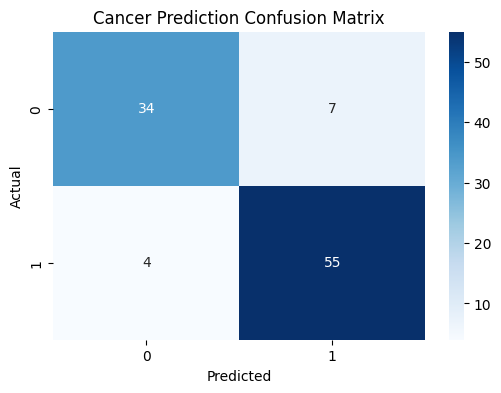

In [31]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Cancer Prediction Confusion Matrix")
plt.show()


In [32]:
# STEP 13: Feature Importance

In [33]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
1,Cell_Growth_Index,1.387231
0,Serial No,0.890003
6,Health_Index,0.783337
3,Tumor_Stage,0.577006
2,Genetic_Risk_Score,0.567637
7,Biopsy_Result,0.403540
5,Family_History,0.358572
4,SOP,0.000808


In [34]:
# STEP 14: Prediction on New Patient Data

In [36]:
sample_patient = np.array([[0, 320, 110, 4, 4.5, 4.0, 9.2, 1]])
sample_patient_scaled = scaler.transform(sample_patient)

prediction = model.predict(sample_patient_scaled)

if prediction[0] == 1:
    print("⚠️ High Cancer Risk Detected")
else:
    print("✅ Low Cancer Risk Detected")

⚠️ High Cancer Risk Detected


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
print("""This project focuses on predicting cancer risk using machine learning techniques based on structured data analysis. The objective is to classify individuals into high-risk or low-risk cancer categories by analyzing multiple factors such as genetic risk, lifestyle habits, tumor stage, family history, and overall health indicators. The dataset is sourced from an open repository and is preprocessed through feature renaming, selection, and normalization to suit a healthcare prediction scenario. A Logistic Regression model is implemented due to its reliability and interpretability in binary classification problems. The data is divided into training and testing sets, and model performance is evaluated using accuracy metrics and confusion matrix analysis. The system also supports prediction on new input data, demonstrating its potential application in early cancer risk assessment and decision support systems.""")

This project focuses on predicting cancer risk using machine learning techniques based on structured data analysis. The objective is to classify individuals into high-risk or low-risk cancer categories by analyzing multiple factors such as genetic risk, lifestyle habits, tumor stage, family history, and overall health indicators. The dataset is sourced from an open repository and is preprocessed through feature renaming, selection, and normalization to suit a healthcare prediction scenario. A Logistic Regression model is implemented due to its reliability and interpretability in binary classification problems. The data is divided into training and testing sets, and model performance is evaluated using accuracy metrics and confusion matrix analysis. The system also supports prediction on new input data, demonstrating its potential application in early cancer risk assessment and decision support systems.
